In [27]:
import uproot
import numpy as np
import pandas as pd
import awkward as ak
import vector
import matplotlib
import matplotlib.pyplot as plt

In [3]:
# Trees for dR < 0.4 cut matching
with uproot.open('/data/jchishol/mc16e/mntuple_ttbar_0_parton_ejets_fixed+match0d4_new.root') as og_file:
    reco_tree04 = og_file['reco'].arrays()
    parton_tree04 = og_file['parton'].arrays()

# Trees for dR < 0.6 cut matching
with uproot.open('/data/jchishol/mc16e/mntuple_ttbar_0_parton_ejets_fixed+match0d4.root') as og_file:
    reco_tree06 = og_file['reco'].arrays()
    parton_tree06 = og_file['parton'].arrays()

In [4]:
# Matching info for dR < 0.4 cut
match_data04 = np.array(np.load('/data/jchishol/mc16e/matching_info/matching_info_0_parton_ejets0d4_new.npy'))
event_indices04 = match_data04[:,0].astype(int)
best_jets04 = match_data04[:,1].astype(int)
matched_pars04 = match_data04[:,2]
dRs04 = match_data04[:,3].astype(float)
frac_delta_pts04 = match_data04[:,4].astype(float)
num_events04 = len(parton_tree04['eventNumber'])
num_matched04 = len(dRs04)

print('For new dR<0.4 matching:')
print('--------------------')
print('Total number of events: ', num_events04)
print('Number of matched pairs: ', num_matched04)
print('Percentage of matches with dR<0.4: %f%%' % (100*num_matched04/(4*num_events04)))
print('Percentage of these successful matches (i.e. dR < 0.4) that have frac pt > -1: %f%%' % (100*len(frac_delta_pts04[frac_delta_pts04>-1])/num_matched04))
print('Percentage of matches with dR<0.4 AND fractional $\Delta p_T$ > -1: %f%%' % (100*len(frac_delta_pts04[frac_delta_pts04>-1])/(4*num_events04)))
print('Percentage of matches with dR<0.4 AND fractional $\Delta p_T$ < -1: %f%%\n' % (100*len(frac_delta_pts04[frac_delta_pts04<-1])/(4*num_events04)))


# Matching info for dR < 0.46cut
match_data06 = np.array(np.load('/data/jchishol/mc16e/matching_info/matching_info_0_parton_ejets0d4.npy'))
event_indices06 = match_data06[:,0].astype(int)
best_jets06 = match_data06[:,1].astype(int)
matched_pars06 = match_data06[:,2]
dRs06 = match_data06[:,3].astype(float)
frac_delta_pts06 = match_data06[:,4].astype(float)
num_events06 = len(parton_tree06['eventNumber'])
num_matched06 = len(dRs06)

print('For old dR<0.4 matching:')
print('--------------------')
print('Total number of events: ', num_events06)
print('Number of matched pairs: ', num_matched06)
print('Percentage of matches with dR<0.4: %f%%' % (100*num_matched06/(4*num_events06)))
print('Percentage of these successful matches (i.e. dR < 0.4) that have frac pt > -1: %f%%' % (100*len(frac_delta_pts06[frac_delta_pts06>-1])/num_matched06))
print('Percentage of matches with dR<0.4 AND fractional $\Delta p_T$ > -1: %f%%' % (100*len(frac_delta_pts06[frac_delta_pts06>-1])/(4*num_events06)))
print('Percentage of matches with dR<0.4 AND fractional $\Delta p_T$ < -1: %f%%\n' % (100*len(frac_delta_pts06[frac_delta_pts06<-1])/(4*num_events06)))

For new dR<0.4 matching:
--------------------
Total number of events:  765388
Number of matched pairs:  2602607
Percentage of matches with dR<0.4: 85.009400%
Percentage of these successful matches (i.e. dR < 0.4) that have frac pt > -1: 99.090527%
Percentage of matches with dR<0.4 AND fractional $\Delta p_T$ > -1: 84.236263%
Percentage of matches with dR<0.4 AND fractional $\Delta p_T$ < -1: 0.773137%

For old dR<0.4 matching:
--------------------
Total number of events:  765388
Number of matched pairs:  2640887
Percentage of matches with dR<0.4: 86.259747%
Percentage of these successful matches (i.e. dR < 0.4) that have frac pt > -1: 98.340255%
Percentage of matches with dR<0.4 AND fractional $\Delta p_T$ > -1: 84.828055%
Percentage of matches with dR<0.4 AND fractional $\Delta p_T$ < -1: 1.431692%



In [ ]:
plt.figure('dR')
plt.hist(dRs06,bins=30,range=(0,0.6),label='dR < 0.6',density=True,histtype='step')
plt.hist(dRs04,bins=30,range=(0,0.6),label='dR < 0.4',density=True,histtype='step')
plt.xlabel('dR')
plt.ylabel('Counts')
plt.legend()
plt.show()

plt.figure('frac_delta_pt')
plt.hist(frac_delta_pts06,bins=30,range=(-1,1),label='dR < 0.6',density=True,histtype='step')
plt.hist(frac_delta_pts04,bins=30,range=(-1,1),label='dR < 0.4',density=True,histtype='step')
plt.xlabel('Fractional $\Delta p_T$')
plt.ylabel('Counts')
plt.legend()
plt.show()

In [5]:
# dR < 0.4 dataframes
print('For dR < 0.4 matching:')
print('----------------------')
print('All data:')
df04 = pd.DataFrame({'Event':event_indices04, 'Jet':best_jets04,'Parent': matched_pars04, 'dR':dRs04.round(3), 'frac delta pt':frac_delta_pts04.round(3)})
#df_grouped04 = df04.groupby(['Event'], as_index=True).agg({'Jet': list,'Parent': list,'dR': list,'frac delta pt': list})
print(df04)
print('Not great matches:')
df04_bad = df04[df04['frac delta pt']<-1]
print(df04_bad)

# dR < 0.6 dataframes
print('For dR < 0.6 matching:')
print('----------------------')
print('All data:')
df06 = pd.DataFrame({'Event':event_indices06, 'Jet':best_jets06,'Parent': matched_pars06, 'dR':dRs06.round(3), 'frac delta pt':frac_delta_pts06.round(3)})
#df_grouped06 = df06.groupby(['Event'], as_index=True).agg({'Jet': list,'Parent': list,'dR': list,'frac delta pt': list})
print(df06)
print('Not great matches:')
df06_bad = df06[df06['frac delta pt']<-1]
print(df06_bad)


For dR < 0.4 matching:
----------------------
All data:
          Event  Jet             Parent     dR  frac delta pt
0             0    0           b_from_t  0.018         -0.147
1             0    4        b_from_tbar  0.273          0.234
2             0    2  Wdecay1_from_tbar  0.034          0.066
3             0    3  Wdecay2_from_tbar  0.018          0.012
4             1    1           b_from_t  0.031          0.005
...         ...  ...                ...    ...            ...
2602602  765386    3     Wdecay1_from_t  0.131          0.126
2602603  765386    2     Wdecay2_from_t  0.085         -0.270
2602604  765387    0           b_from_t  0.007         -0.029
2602605  765387    1        b_from_tbar  0.012          0.150
2602606  765387    4     Wdecay2_from_t  0.017         -0.249

[2602607 rows x 5 columns]
Not great matches:
          Event  Jet             Parent     dR  frac delta pt
233          72    2  Wdecay1_from_tbar  0.109         -1.347
345         105    0  Wdecay1

In [6]:
df_grouped04 = df04.groupby(['Event'], as_index=False).agg({'Jet': list,'Parent': list,'dR': list,'frac delta pt': list})
print(df_grouped04)

         Event           Jet  \
0            0  [0, 4, 2, 3]   
1            1     [1, 2, 5]   
2            2  [3, 1, 4, 0]   
3            3     [3, 1, 4]   
4            4     [1, 0, 3]   
...        ...           ...   
765292  765383     [0, 3, 1]   
765293  765384     [0, 3, 2]   
765294  765385     [1, 0, 2]   
765295  765386  [1, 0, 3, 2]   
765296  765387     [0, 1, 4]   

                                                   Parent  \
0       [b_from_t, b_from_tbar, Wdecay1_from_tbar, Wde...   
1              [b_from_t, b_from_tbar, Wdecay1_from_tbar]   
2       [b_from_t, b_from_tbar, Wdecay1_from_tbar, Wde...   
3              [b_from_t, b_from_tbar, Wdecay2_from_tbar]   
4              [b_from_t, b_from_tbar, Wdecay1_from_tbar]   
...                                                   ...   
765292         [b_from_t, b_from_tbar, Wdecay2_from_tbar]   
765293            [b_from_t, b_from_tbar, Wdecay1_from_t]   
765294            [b_from_t, b_from_tbar, Wdecay1_from_t]   
76529

In [7]:
df_grouped04['Jet 0 Matched'] = df_grouped04.apply(lambda row : True if 0 in row['Jet'] else False, axis=1)
df_notall = df_grouped04[df_grouped04['Jet 0 Matched']==False]
print(df_notall)

         Event        Jet                                      Parent  \
1            1  [1, 2, 5]  [b_from_t, b_from_tbar, Wdecay1_from_tbar]   
3            3  [3, 1, 4]  [b_from_t, b_from_tbar, Wdecay2_from_tbar]   
7            7  [1, 3, 2]     [b_from_t, b_from_tbar, Wdecay1_from_t]   
14          14     [2, 1]                     [b_from_t, b_from_tbar]   
18          18  [2, 4, 1]  [b_from_t, b_from_tbar, Wdecay1_from_tbar]   
...        ...        ...                                         ...   
765277  765368     [3, 2]                     [b_from_t, b_from_tbar]   
765280  765371  [2, 3, 1]  [b_from_t, b_from_tbar, Wdecay1_from_tbar]   
765281  765372     [1, 2]               [b_from_tbar, Wdecay2_from_t]   
765282  765373     [1, 2]                  [b_from_t, Wdecay2_from_t]   
765287  765378  [2, 1, 3]     [b_from_t, b_from_tbar, Wdecay1_from_t]   

                           dR             frac delta pt  Jet 0 Matched  
1       [0.031, 0.014, 0.016]     [0.005, 0.031, 0

-------------------------------
            Event 1            
-------------------------------
b_from_t pt= 85924.64705390642
b_from_t phi= -1.8743471122351552
b_from_t eta= 0.5347170285408821
b_from_tbar pt= 70109.66577722107
b_from_tbar phi= -1.711578047789178
b_from_tbar eta= 1.1947406519896824
Wdecay1_from_tbar pt= 37074.7265625
Wdecay1_from_tbar phi= -3.110818862915039
Wdecay1_from_tbar eta= 0.5996900200843811
Wdecay2_from_tbar pt= 15014.2216796875
Wdecay2_from_tbar phi= -0.5016816854476929
Wdecay2_from_tbar eta= -1.6796337366104126
Jet pts= [8.67e+04, 8.55e+04, 6.79e+04, 5.87e+04, 3.86e+04, 2.58e+04]
Jet phis= [2.18, -1.84, -1.71, 0.847, 0.586, -3.11]
Jet etas= [2.21, 0.528, 1.18, -0.777, 0.203, 0.616]
-------------------------------
            Event 3            
-------------------------------
b_from_t pt= 271659.2594025697
b_from_t phi= 2.9227151698140768
b_from_t eta= 1.0939737168327932
b_from_tbar pt= 267438.9670611371
b_from_tbar phi= -0.7159211788945243
b_from_tbar eta= 

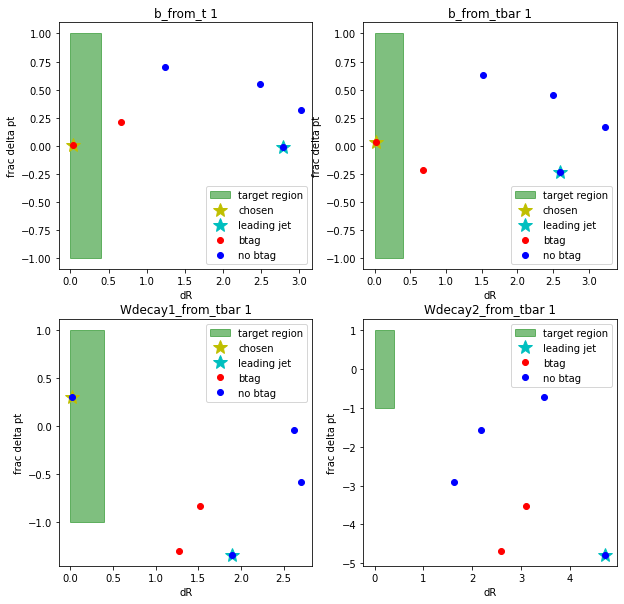

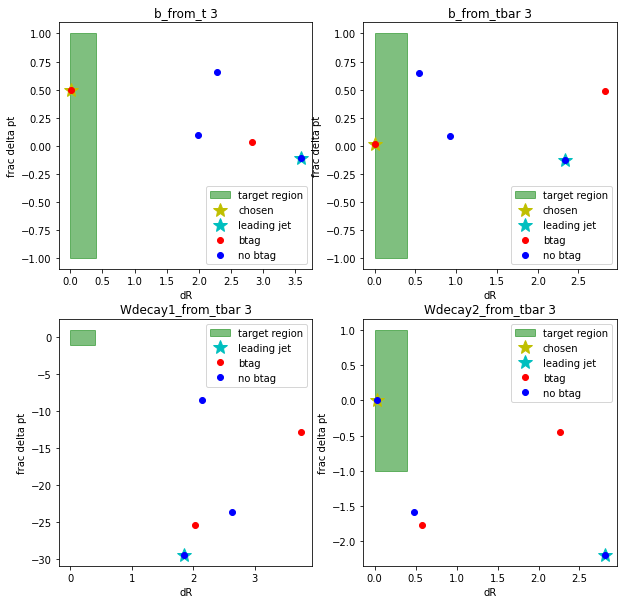

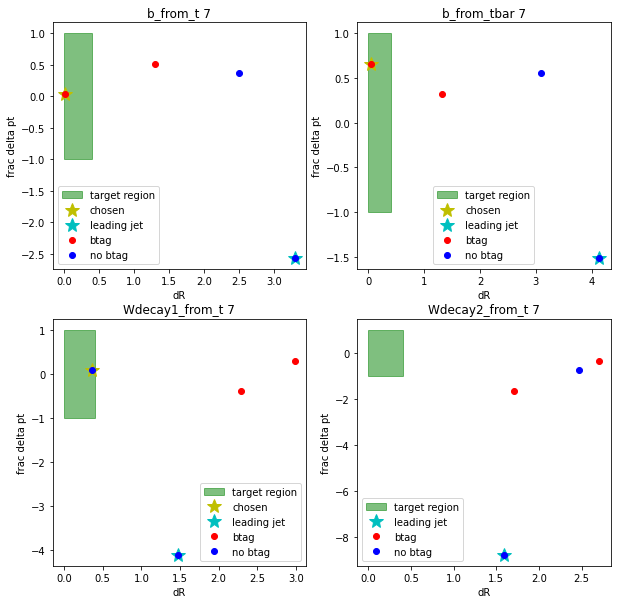

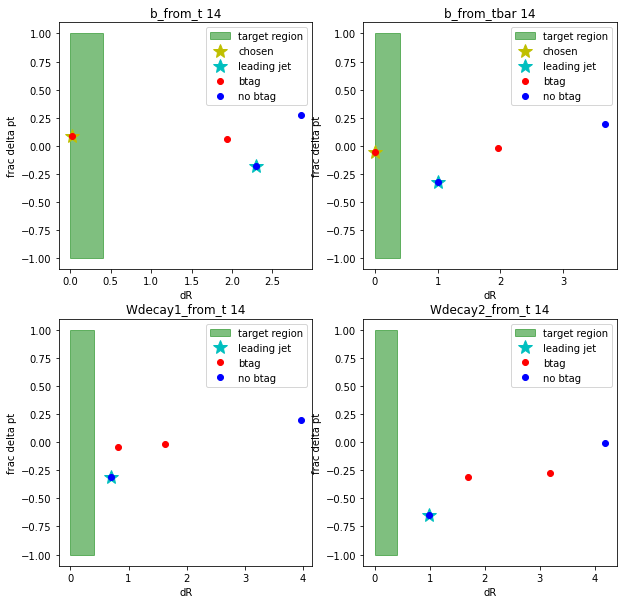

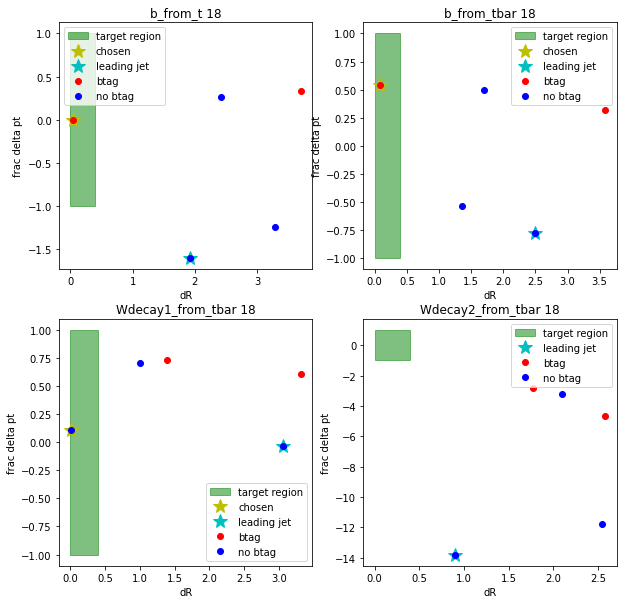

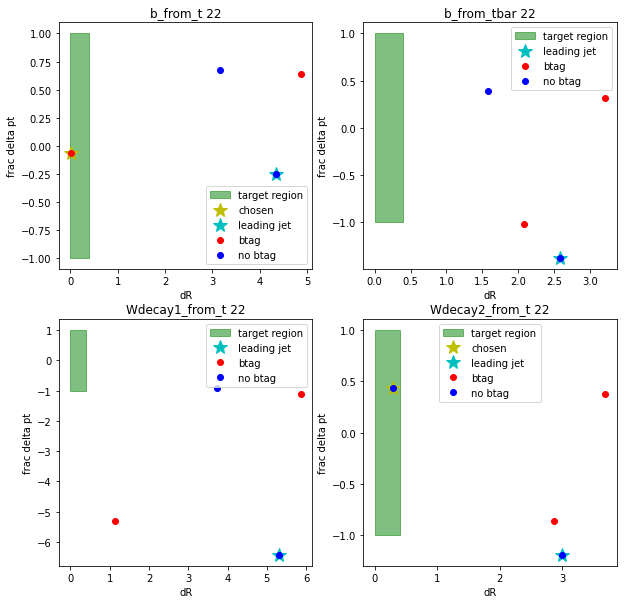

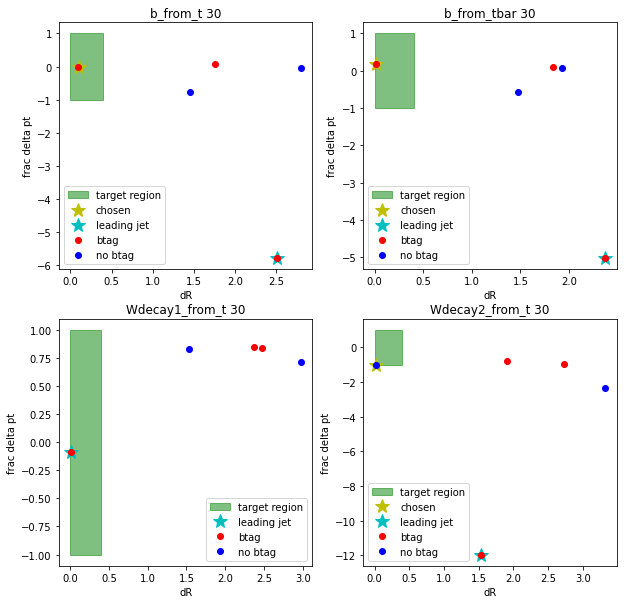

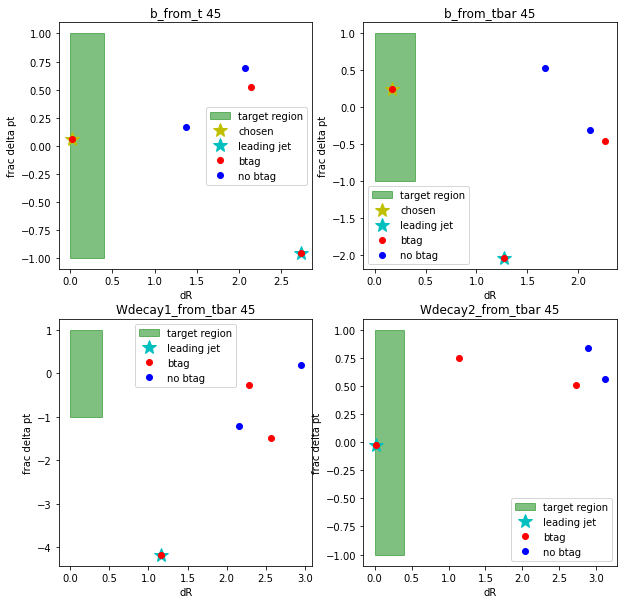

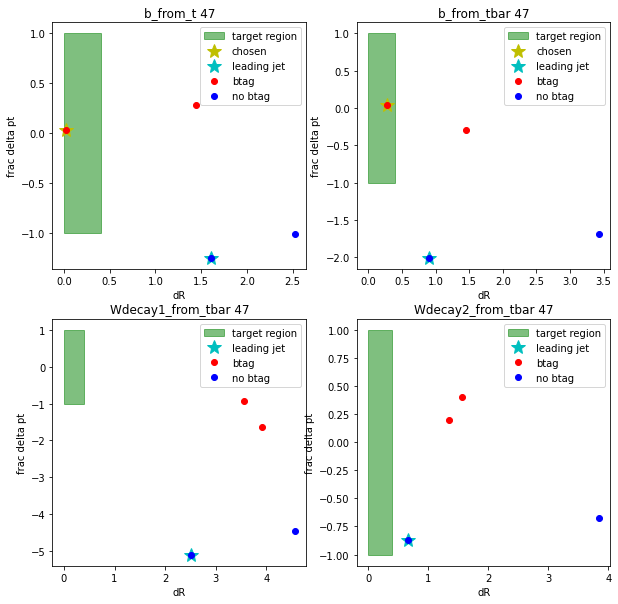

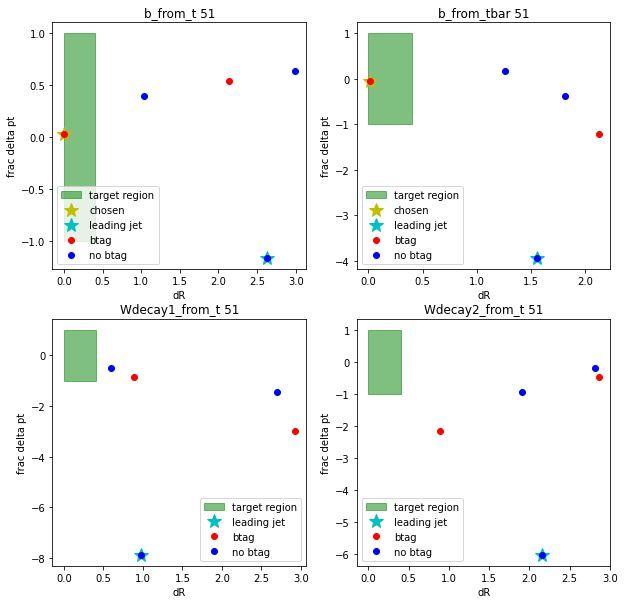

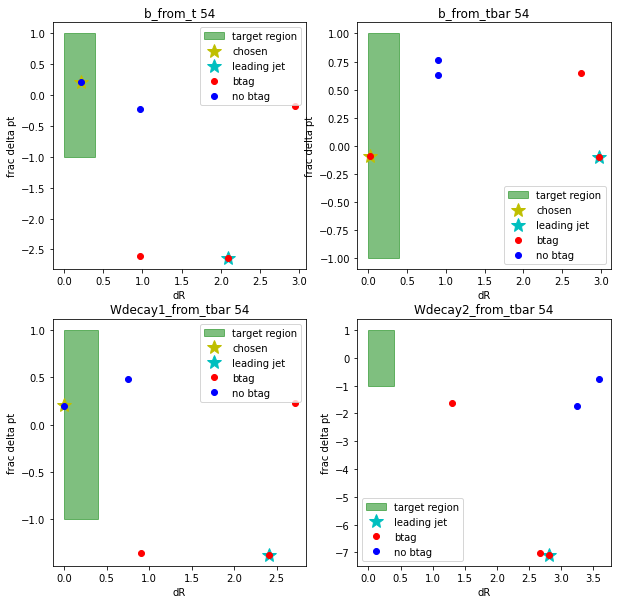

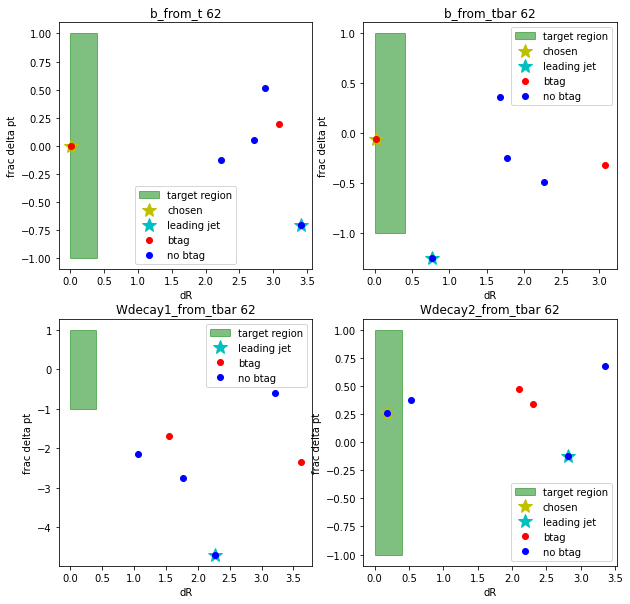

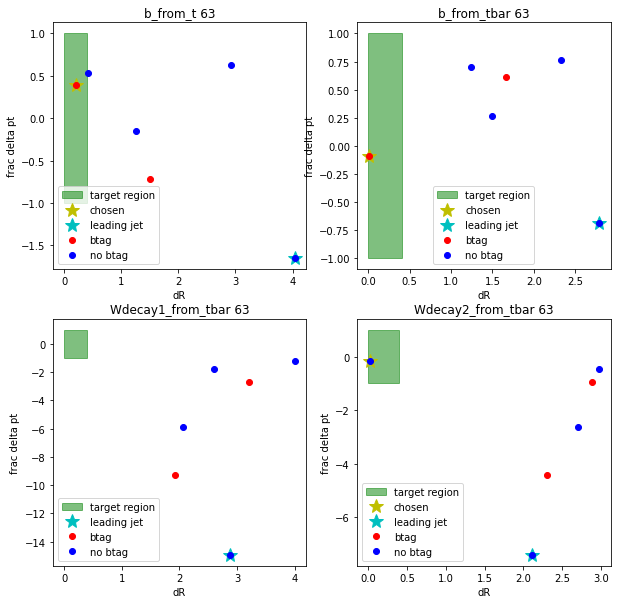

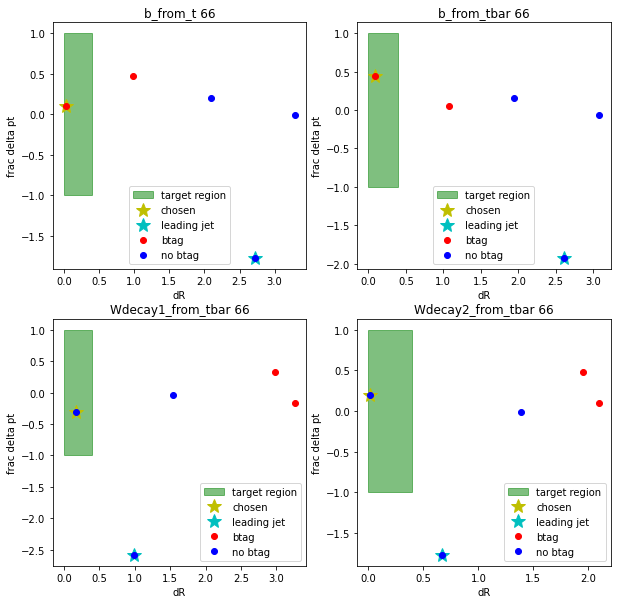

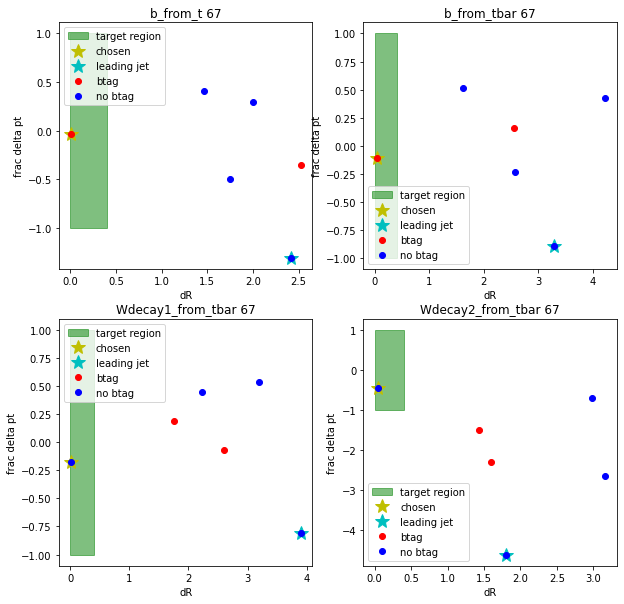

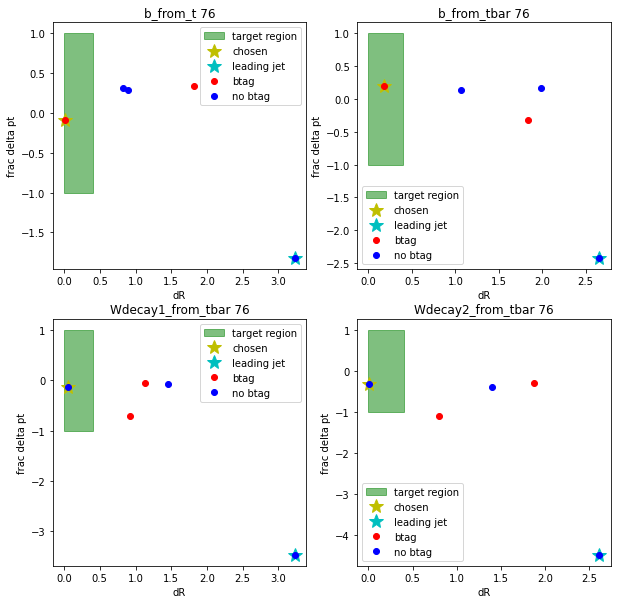

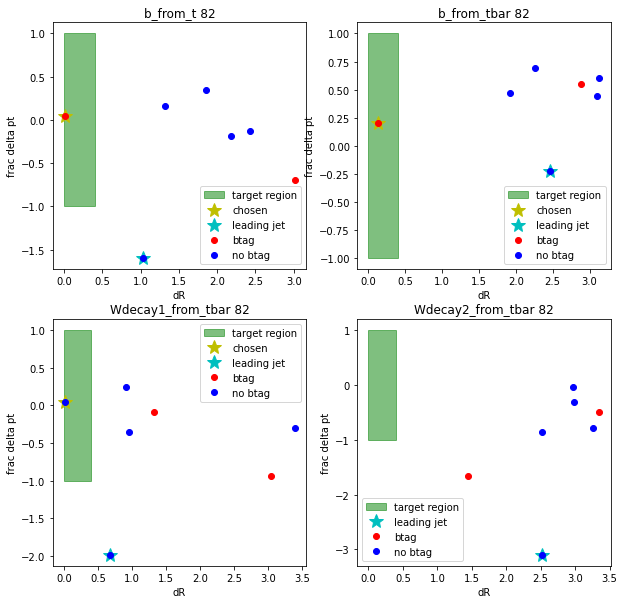

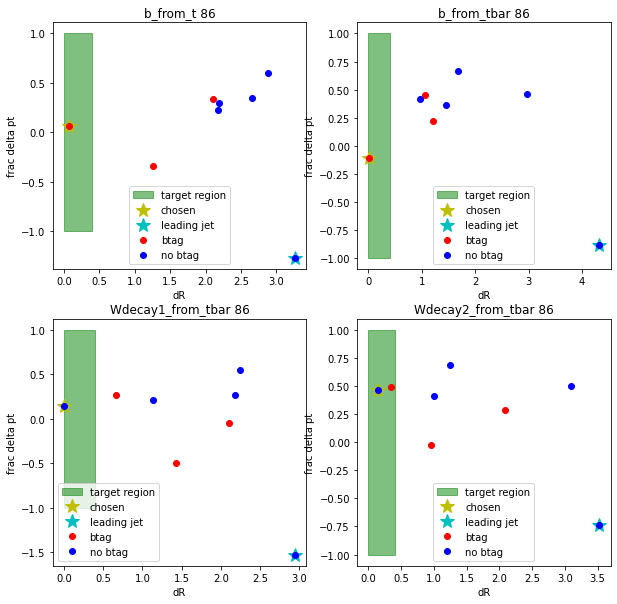

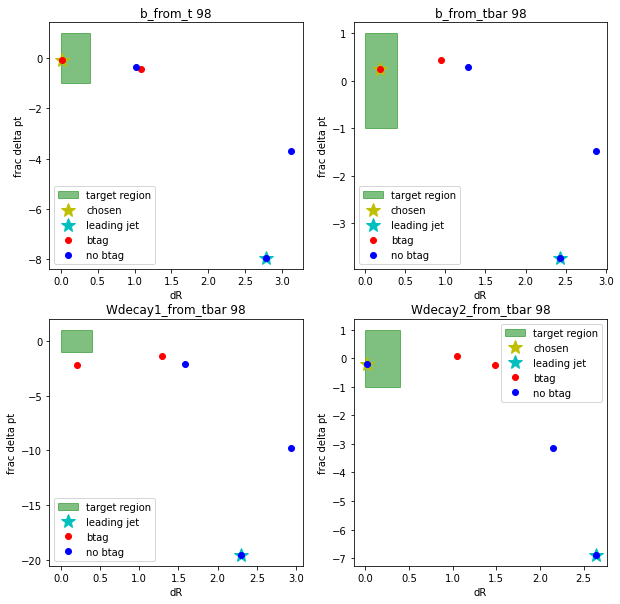

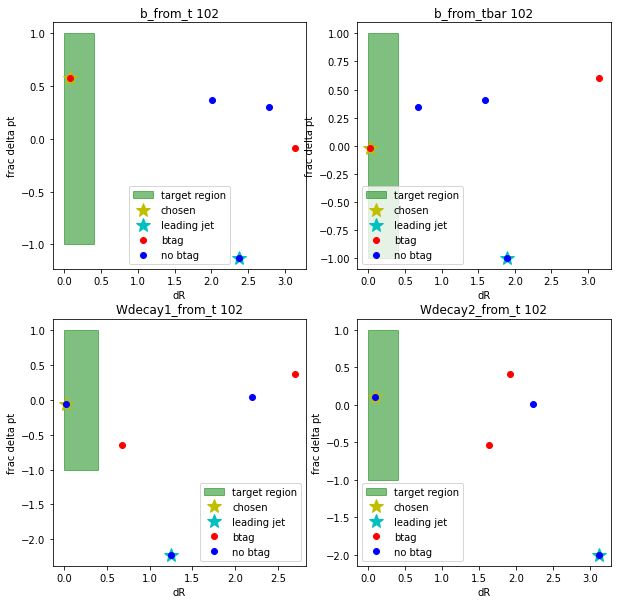

In [35]:


# Calculate particle vectors
b_from_t_vec = vector.array({"pt":parton_tree04['MC_b_from_t_afterFSR_pt'],"eta":parton_tree04['MC_b_from_t_afterFSR_eta'],"phi":parton_tree04['MC_b_from_t_afterFSR_phi'],"E":parton_tree04['MC_b_from_t_afterFSR_E']})
b_from_tbar_vec = vector.array({"pt":parton_tree04['MC_b_from_tbar_afterFSR_pt'],"eta":parton_tree04['MC_b_from_tbar_afterFSR_eta'],"phi":parton_tree04['MC_b_from_tbar_afterFSR_phi'],"E":parton_tree04['MC_b_from_tbar_afterFSR_E']})
Wdecay1_from_t_vec = vector.array({"pt":parton_tree04['MC_Wdecay1_from_t_afterFSR_pt'],"eta":parton_tree04['MC_Wdecay1_from_t_afterFSR_eta'],"phi":parton_tree04['MC_Wdecay1_from_t_afterFSR_phi'],"E":parton_tree04['MC_Wdecay1_from_t_afterFSR_E']})
Wdecay2_from_t_vec = vector.array({"pt":parton_tree04['MC_Wdecay2_from_t_afterFSR_pt'],"eta":parton_tree04['MC_Wdecay2_from_t_afterFSR_y'],"phi":parton_tree04['MC_Wdecay2_from_t_afterFSR_phi'],"E":parton_tree04['MC_Wdecay2_from_t_afterFSR_E']})   # Approx eta with y for now, since eta empty
Wdecay1_from_tbar_vec = vector.array({"pt":parton_tree04['MC_Wdecay1_from_tbar_afterFSR_pt'],"eta":parton_tree04['MC_Wdecay1_from_tbar_afterFSR_eta'],"phi":parton_tree04['MC_Wdecay1_from_tbar_afterFSR_phi'],"E":parton_tree04['MC_Wdecay1_from_tbar_afterFSR_E']})
Wdecay2_from_tbar_vec = vector.array({"pt":parton_tree04['MC_Wdecay2_from_tbar_afterFSR_pt'],"eta":parton_tree04['MC_Wdecay2_from_tbar_afterFSR_eta'],"phi":parton_tree04['MC_Wdecay2_from_tbar_afterFSR_phi'],"E":parton_tree04['MC_Wdecay2_from_tbar_afterFSR_E']})

# Define some helpful ranges
had_range = list(range(1,9))+list(range(-8,0))                     # Quarks have pdgid 1 to 8 (negatives indicate antiparticles)
lep_range = list(range(11,19))+list(range(-18,10))                 # Leptons have pdgid 11 to 18
bos_range = list(range(21,26))+list(range(-25,20))+[9,37,-9,-37]   # Bosons have pdgid 21 to 25, and 9, and 37


for i in df_notall['Event']:

    print('-------------------------------')
    print('            Event '+str(i)+'            ')
    print('-------------------------------')



     # Calculate the jet vectors for this event, as well as get the btags
    jet_vectors = vector.array({"pt":reco_tree04['jet_pt'][i],"eta":reco_tree04['jet_eta'][i],"phi":reco_tree04['jet_phi'][i],"E":reco_tree04['jet_e'][i]})
    jet_btags = np.array(reco_tree04['jet_btagged'][i])

    particle_dict = {'b_from_t':{'dRs':jet_vectors.deltaR(b_from_t_vec[i]),'frac_delta_pts':((b_from_t_vec[i].pt - jet_vectors.pt)/b_from_t_vec[i].pt)},'b_from_tbar':{'dRs':jet_vectors.deltaR(b_from_tbar_vec[i]),'frac_delta_pts':((b_from_tbar_vec[i].pt - jet_vectors.pt)/b_from_tbar_vec[i].pt)}}
    if parton_tree04['MC_Wdecay1_from_t_afterFSR_pdgid'][i] in had_range or parton_tree04['MC_Wdecay2_from_t_afterFSR_pdgid'][i] in had_range:
        particle_dict['Wdecay1_from_t'] = {'dRs':jet_vectors.deltaR(Wdecay1_from_t_vec[i]),'frac_delta_pts':((Wdecay1_from_t_vec[i].pt - jet_vectors.pt)/Wdecay1_from_t_vec[i].pt)}
        particle_dict['Wdecay2_from_t'] = {'dRs':jet_vectors.deltaR(Wdecay2_from_t_vec[i]),'frac_delta_pts':((Wdecay2_from_t_vec[i].pt - jet_vectors.pt)/Wdecay2_from_t_vec[i].pt)}
    elif parton_tree04['MC_Wdecay1_from_tbar_afterFSR_pdgid'][i] in had_range or parton_tree04['MC_Wdecay2_from_tbar_afterFSR_pdgid'][i] in had_range:
        particle_dict['Wdecay1_from_tbar'] = {'dRs':jet_vectors.deltaR(Wdecay1_from_tbar_vec[i]),'frac_delta_pts':((Wdecay1_from_tbar_vec[i].pt - jet_vectors.pt)/Wdecay1_from_tbar_vec[i].pt)}
        particle_dict['Wdecay2_from_tbar'] = {'dRs':jet_vectors.deltaR(Wdecay2_from_tbar_vec[i]),'frac_delta_pts':((Wdecay2_from_tbar_vec[i].pt - jet_vectors.pt)/Wdecay2_from_tbar_vec[i].pt)}
    else:
        print('WARNING: none of the W decays in event %d seem to be jets! What?!' % i)
        print('pdgids: %d, %d, %d, %d' % (parton_tree04['MC_Wdecay1_from_t_afterFSR_pdgid'][i] ,parton_tree04['MC_Wdecay2_from_t_afterFSR_pdgid'][i] ,parton_tree04['MC_Wdecay1_from_tbar_afterFSR_pdgid'][i] ,parton_tree04['MC_Wdecay2_from_tbar_afterFSR_pdgid'][i] ))

    fig, axs = plt.subplots(2,2,figsize=(10,10))

    ax1 = [0,0,1,1]
    ax2 = [0,1,0,1]

    for a,par in enumerate(particle_dict):

        #if par not in df_notall[df_notall['Event']==i]['Parent'].to_list()[0]:

        dR_points_btag = []
        dR_points_nobtag = []
        pt_points_btag = []
        pt_points_nobtag = []

        for j in range(len(particle_dict[par]['dRs'])):
            if jet_btags[j]==1:
                dR_points_btag.append(particle_dict[par]['dRs'][j])
                pt_points_btag.append(particle_dict[par]['frac_delta_pts'][j])
            elif jet_btags[j]==0:
                dR_points_nobtag.append(particle_dict[par]['dRs'][j])
                pt_points_nobtag.append(particle_dict[par]['frac_delta_pts'][j])

        #plt.figure(par+' '+str(i))
        axs[ax1[a],ax2[a]].set_title(par+' '+str(i))

        rect1 = matplotlib.patches.Rectangle((0,-1), 0.4, 2, color='green',alpha=0.5,label='target region')
        axs[ax1[a],ax2[a]].add_patch(rect1)  # gca = 'grab current axis

        if par in df_notall[df_notall['Event']==i]['Parent'].to_list()[0]:
            index = df_notall[df_notall['Event']==i]['Parent'].to_list()[0].index(par)
            temp_df = df_notall[df_notall['Event']==i]
            axs[ax1[a],ax2[a]].plot([temp_df['dR'].to_list()[0][index]],[temp_df['frac delta pt'].to_list()[0][index]],'y*',markersize=15,label='chosen')
            del temp_df

        axs[ax1[a],ax2[a]].plot([particle_dict[par]['dRs'][0]],[particle_dict[par]['frac_delta_pts'][0]],'c*',markersize=15,label='leading jet')
        axs[ax1[a],ax2[a]].plot(dR_points_btag,pt_points_btag,'ro',label='btag')
        axs[ax1[a],ax2[a]].plot(dR_points_nobtag,pt_points_nobtag,'bo',label='no btag')


        axs[ax1[a],ax2[a]].legend()
        axs[ax1[a],ax2[a]].set_xlabel('dR')
        axs[ax1[a],ax2[a]].set_ylabel('frac delta pt')

        print(par+' pt=',parton_tree04['MC_'+par+'_afterFSR_pt'][i])
        print(par+' phi=',parton_tree04['MC_'+par+'_afterFSR_phi'][i])
        print(par+' eta=',parton_tree04['MC_'+par+'_afterFSR_eta'][i])

    print('Jet pts=',reco_tree04['jet_pt'][i])
    print('Jet phis=',reco_tree04['jet_phi'][i])
    print('Jet etas=',reco_tree04['jet_eta'][i])
    print('Jet btags=',jet_btags)

    #fig.show()

    if i > 100: break
        

    

In [ ]:
# Calculate particle vectors
b_from_t_vec = vector.array({"pt":parton_tree04['MC_b_from_t_afterFSR_pt'],"eta":parton_tree04['MC_b_from_t_afterFSR_eta'],"phi":parton_tree04['MC_b_from_t_afterFSR_phi'],"E":parton_tree04['MC_b_from_t_afterFSR_E']})
b_from_tbar_vec = vector.array({"pt":parton_tree04['MC_b_from_tbar_afterFSR_pt'],"eta":parton_tree04['MC_b_from_tbar_afterFSR_eta'],"phi":parton_tree04['MC_b_from_tbar_afterFSR_phi'],"E":parton_tree04['MC_b_from_tbar_afterFSR_E']})
Wdecay1_from_t_vec = vector.array({"pt":parton_tree04['MC_Wdecay1_from_t_afterFSR_pt'],"eta":parton_tree04['MC_Wdecay1_from_t_afterFSR_eta'],"phi":parton_tree04['MC_Wdecay1_from_t_afterFSR_phi'],"E":parton_tree04['MC_Wdecay1_from_t_afterFSR_E']})
Wdecay2_from_t_vec = vector.array({"pt":parton_tree04['MC_Wdecay2_from_t_afterFSR_pt'],"eta":parton_tree04['MC_Wdecay2_from_t_afterFSR_y'],"phi":parton_tree04['MC_Wdecay2_from_t_afterFSR_phi'],"E":parton_tree04['MC_Wdecay2_from_t_afterFSR_E']})   # Approx eta with y for now, since eta empty
Wdecay1_from_tbar_vec = vector.array({"pt":parton_tree04['MC_Wdecay1_from_tbar_afterFSR_pt'],"eta":parton_tree04['MC_Wdecay1_from_tbar_afterFSR_eta'],"phi":parton_tree04['MC_Wdecay1_from_tbar_afterFSR_phi'],"E":parton_tree04['MC_Wdecay1_from_tbar_afterFSR_E']})
Wdecay2_from_tbar_vec = vector.array({"pt":parton_tree04['MC_Wdecay2_from_tbar_afterFSR_pt'],"eta":parton_tree04['MC_Wdecay2_from_tbar_afterFSR_eta'],"phi":parton_tree04['MC_Wdecay2_from_tbar_afterFSR_phi'],"E":parton_tree04['MC_Wdecay2_from_tbar_afterFSR_E']})


for i,event in enumerate(list(df04_bad['Event'])):

    dR_points_btag = []
    dR_points_nobtag = []
    pt_points_btag = []
    pt_points_nobtag = []

    min_dR = 100000
    and_the_pt = 0

    plot = True


    par = list(df04_bad['Parent'])[i]

    if par=='b_from_t':
        par_vec=b_from_t_vec[event]
    elif par=='b_from_tbar':
        par_vec=b_from_tbar_vec[event]
    elif par=='Wdecay1_from_t':
        continue
        par_vec=Wdecay1_from_t_vec[event]
    elif par=='Wdecay2_from_t':
        continue
        par_vec=Wdecay2_from_t_vec[event]
    elif par=='Wdecay1_from_tbar':
        continue
        par_vec=Wdecay1_from_tbar_vec[event]
    elif par=='Wdecay2_from_tbar':
        continue
        par_vec=Wdecay2_from_tbar_vec[event]


    for j in range(int(reco_tree04['jet_n'][event])):
        jet_vec = vector.obj(pt=reco_tree04['jet_pt'][event][j],eta=reco_tree04['jet_eta'][event][j],phi=reco_tree04['jet_phi'][event][j],E=reco_tree04['jet_e'][event][j])
        this_dR = par_vec.deltaR(jet_vec)
        this_pt = (par_vec.pt-jet_vec.pt)/par_vec.pt
        
        if reco_tree04['jet_btagged'][event][j]==1:
            dR_points_btag.append(this_dR)
            pt_points_btag.append(this_pt)
        else:
            dR_points_nobtag.append(this_dR)
            pt_points_nobtag.append(this_pt)

        if this_dR < 0.4 and this_pt > -1:
            plot = True


    if plot==True:


        plt.figure(str(event))
        plt.title(str(event)+' '+par)

        rect1 = matplotlib.patches.Rectangle((0,-1), 0.4, 2, color='green',alpha=0.5,label='target region')
        plt.gca().add_patch(rect1)  # gca = 'grab current axis
        plt.plot([list(df04_bad['dR'])[i]],[list(df04_bad['frac delta pt'])[i]],'y*',markersize=15,label='chosen')
        plt.plot(dR_points_btag,pt_points_btag,'ro',label='btag')
        plt.plot(dR_points_nobtag,pt_points_nobtag,'bo',label='no btag')

        plt.legend()
        plt.xlabel('dR')
        plt.ylabel('frac delta pt')
        plt.show()